In [1]:
%load_ext autoreload
%autoreload 2
from funcs import readin, show_adj_matrix, obj_function, adjmatrix2adjmap, GreedySPlex, VariableNeighborhoodDescent, Flip1, Solution, GRASP, SimulatedAnnealing 
import numpy as np

from itertools import chain

In [2]:
S, A, W = readin('data/test1.txt')
N = A.shape[0]
A1 = np.zeros(A.shape)


In [3]:
import networkx as nx

G = nx.from_numpy_array(A)
for g in nx.connected_components(G):
    print(A[list(g)])

[[0 1 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 0 1 1 0 1 1 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 1 0]]


In [4]:
def is_splex( A: np.ndarray,  s: int) -> bool:
    G = nx.from_numpy_array(A)

    for cc in nx.connected_components(G):
        if not is_splex_component(cc, s, A):
            return False
        
    return True


def is_splex_component(component : set, s: int, A: np.ndarray = A):
    component = list(component)
    neighbor_degrees = A[component].sum(axis=1)
    return (neighbor_degrees >= neighbor_degrees.shape[0] - s).sum() > 0 
    
is_splex(A, 3)

False

In [5]:
# sum([not is_splex(GreedySPlex(A,W,S).random_solution()[0], S) for _ in range(10000)])

In [6]:
solver = GreedySPlex(A,W,1)
A1, splexes = solver.random_solution()
splexes, is_splex(A1,1), obj_function(A,A1,W)

({0: {0, 1},
  1: {0, 1},
  2: {2, 3},
  3: {2, 3},
  4: {4, 5, 6},
  5: {4, 5, 6},
  6: {4, 5, 6},
  7: {7, 8},
  8: {7, 8}},
 True,
 24)

In [7]:
A1

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

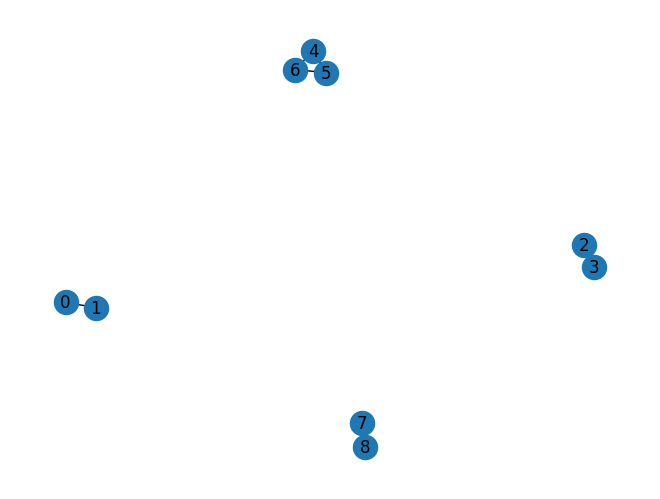

24

In [8]:
show_adj_matrix(A1)
obj_function(A,A1,W)

# Variable Neighborhood Descent 

In [9]:
x0 = Solution(A, W, A1, splexes)
neighs = [Flip1()]

vnd = VariableNeighborhoodDescent(neighs)
vnd.search(x0)


Solution(A=array([[0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int8), W=array([[ 0,  5,  6,  1,  9, 10,  1,  1,  1],
       [ 5,  0,  2,  4,  6,  1,  1,  1,  1],
       [ 6,  2,  0,  3,  1,  4,  2,  1,  1],
       [ 1,  4,  3,  0,  6,  4,  3,  1,  1],
       [ 9,  6,  1,  6,  0,  1,  1,  3,  3],
       [10,  1,  4,  4,  1,  0,  1,  1,  2],
       [ 1,  1,  2,  3,  1,  1,  0,  1,  1],
       [ 1,  1,  1,  1,  3,  1,  1,  0,  1],
       [ 1,  1,  1,  1,  3,  2,  1,  1,  0]], dtype=int32), A1=array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0,

In [10]:
grasp = GRASP(Flip1(), trials = 1000)

grasp.search(S, A, W)

Solution(A=array([[0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int8), W=array([[ 0,  5,  6,  1,  9, 10,  1,  1,  1],
       [ 5,  0,  2,  4,  6,  1,  1,  1,  1],
       [ 6,  2,  0,  3,  1,  4,  2,  1,  1],
       [ 1,  4,  3,  0,  6,  4,  3,  1,  1],
       [ 9,  6,  1,  6,  0,  1,  1,  3,  3],
       [10,  1,  4,  4,  1,  0,  1,  1,  2],
       [ 1,  1,  2,  3,  1,  1,  0,  1,  1],
       [ 1,  1,  1,  1,  3,  1,  1,  0,  1],
       [ 1,  1,  1,  1,  3,  2,  1,  1,  0]], dtype=int32), A1=array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0,

In [11]:
sa = SimulatedAnnealing(5, Flip1())

sa.search(x0=x0)

Solution(A=array([[0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int8), W=array([[ 0,  5,  6,  1,  9, 10,  1,  1,  1],
       [ 5,  0,  2,  4,  6,  1,  1,  1,  1],
       [ 6,  2,  0,  3,  1,  4,  2,  1,  1],
       [ 1,  4,  3,  0,  6,  4,  3,  1,  1],
       [ 9,  6,  1,  6,  0,  1,  1,  3,  3],
       [10,  1,  4,  4,  1,  0,  1,  1,  2],
       [ 1,  1,  2,  3,  1,  1,  0,  1,  1],
       [ 1,  1,  1,  1,  3,  1,  1,  0,  1],
       [ 1,  1,  1,  1,  3,  2,  1,  1,  0]], dtype=int32), A1=array([[1, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1,